<a href="https://colab.research.google.com/github/ximenakrivera/Simulacion/blob/main/Unidad3/Problema_3_Distribuci%C3%B3n_LogNormal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tiempos de espera generados: [11.95295579  8.12675714 11.79311129  8.88436575 11.31140994  8.8725118
 15.83562352 11.25657896  8.00337457  9.41658966 10.1952036   7.66553611
  8.8905005   7.54081071  7.23799755 11.73438261  7.66459512 14.84753338
  8.35470074  7.81951757  7.91841659  7.93765338  9.15035668 11.44272669
 11.54427709  9.14945482  9.50690413  8.20609404  9.10804844 11.32160983
 10.00449661 12.603855    9.92076287 14.431438   10.56650336  9.6655985
  7.2599309   9.93866472  9.14974313 10.5891148  11.82667819 10.5833456
 13.23905275  9.3505227  10.62466454  6.48485964 11.04174329  9.83108292
 10.70546599 13.28628498]


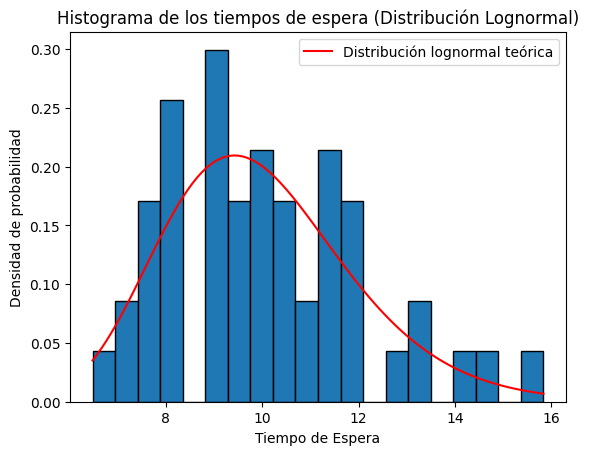

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parámetros originales de la distribución lognormal
media = 10   # Media del tiempo de espera
desv_est = 2  # Desviación estándar
n = 50  # Número de clientes

# Transformación de parámetros para la distribución normal subyacente
sigma_ln = np.sqrt(np.log(1 + (desv_est**2 / media**2)))
mu_ln = np.log(media) - 0.5 * sigma_ln**2
# Generar n números aleatorios U ~ Uniform(0, 1)
U = np.random.uniform(0, 1, n)

# Aplicar la transformada inversa de la normal estándar
Z = mu_ln + sigma_ln * stats.norm.ppf(U)

T = np.exp(Z)  # Tiempos generados

# Mostrar los resultados
print("Tiempos de espera generados:", T)

# Graficar histograma de los tiempos de inactividad generados
plt.hist(T, bins=20, edgecolor='black', density=True)

# Graficar la función teórica de densidad de la distribución lognormal
x = np.linspace(min(T), max(T), 100)
pdf = stats.lognorm.pdf(x, sigma_ln, scale=np.exp(mu_ln))
plt.plot(x, pdf, 'r', label='Distribución lognormal teórica')

plt.title("Histograma de los tiempos de espera (Distribución Lognormal)")
plt.xlabel("Tiempo de Espera")
plt.ylabel("Densidad de probabilidad")
plt.legend()
plt.show()